In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Data Analysis

## load data

In [3]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## data info

Checking which features are available in the dataset

In [4]:
print(train_data.columns.values)


['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_data.info()
print('_'*40)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

- Categorical: Survived, Sex, and Embarked.
- Ordinal: Pclass.

- Continous: Age, Fare.
- Discrete: SibSp, Parch.

## 可视化

### Survived

<Axes: xlabel='Survived', ylabel='count'>

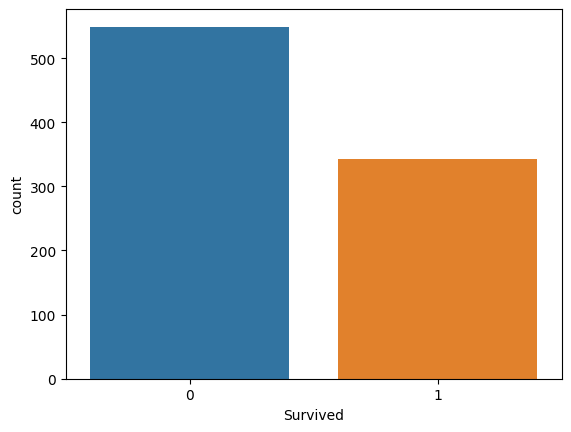

In [7]:
import seaborn as sns
sns.countplot(x = 'Survived', data = train_data)


<Axes: xlabel='Sex', ylabel='count'>

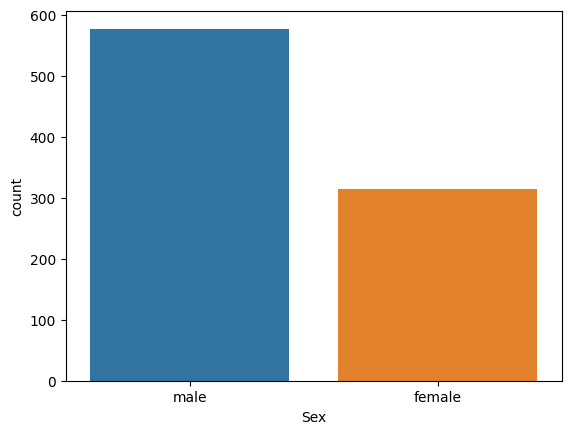

In [15]:
sns.countplot(x = 'Sex', data = train_data)

<Axes: xlabel='Embarked', ylabel='count'>

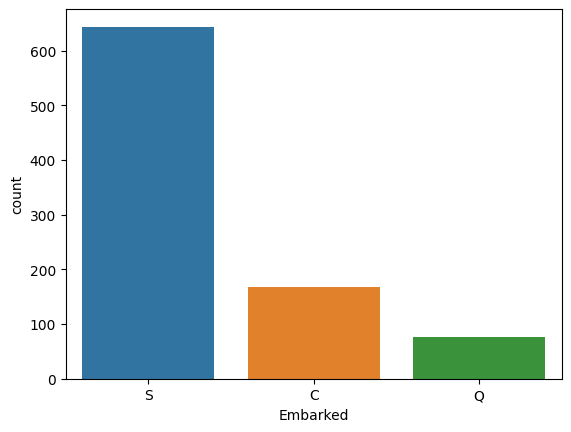

In [8]:
sns.countplot(x = 'Embarked', data = train_data)

绝大部分游客从S登录

<Axes: xlabel='Pclass', ylabel='count'>

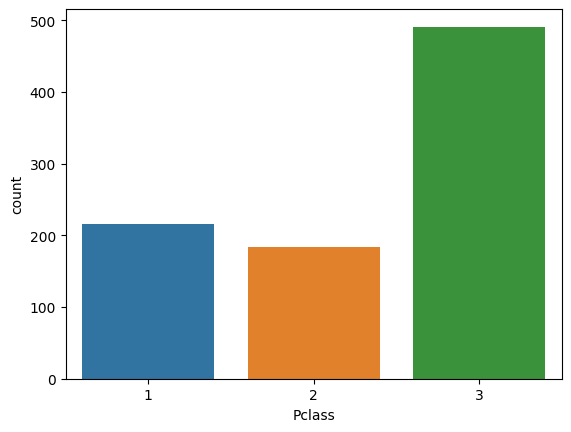

In [10]:
sns.countplot(x = 'Pclass', data = train_data)

3等游客最多

## Numeric

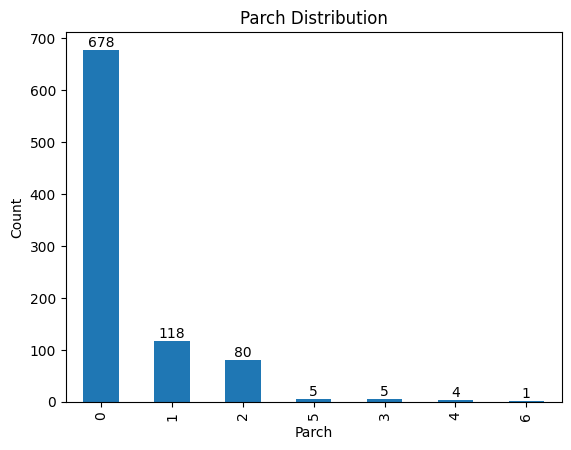

In [11]:

import matplotlib.pyplot as plt

ax = train_data['Parch'].value_counts().plot(kind='bar')

plt.xlabel('Parch')
plt.ylabel('Count')
plt.title('Parch Distribution')

# 在柱子上显示高度
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2,  # X 坐标：柱子中心
            height,                         # Y 坐标：柱子顶端
            int(height),                    # 显示的文字（整数）
            ha='center', va='bottom')       # 水平/垂直对齐方式

plt.show()


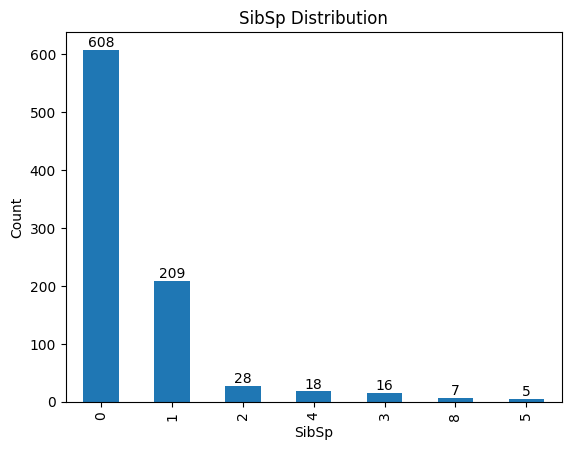

In [12]:


ax = train_data['SibSp'].value_counts().plot(kind='bar')

plt.xlabel('SibSp')
plt.ylabel('Count')
plt.title('SibSp Distribution')

# 在柱子上显示高度
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2,  # X 坐标：柱子中心
            height,                         # Y 坐标：柱子顶端
            int(height),                    # 显示的文字（整数）
            ha='center', va='bottom')       # 水平/垂直对齐方式

plt.show()


### Pclass和Survived关系

<Axes: xlabel='Survived', ylabel='count'>

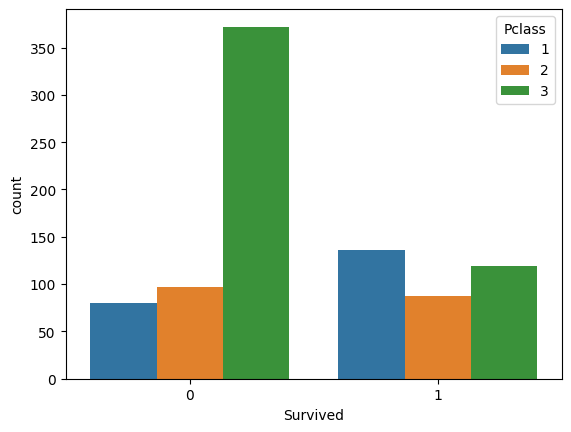

In [61]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = train_data)


### Sex和Survived关系

<Axes: xlabel='Survived', ylabel='count'>

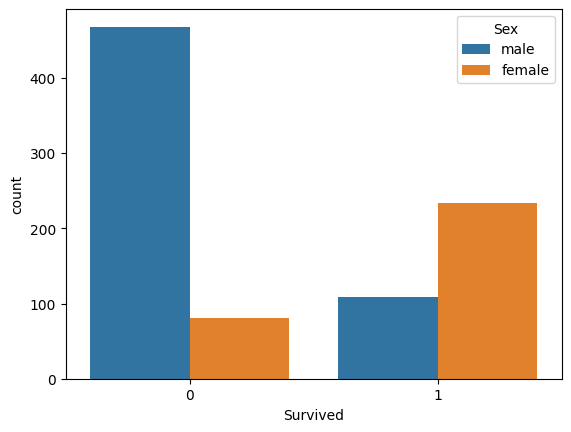

In [13]:
sns.countplot(x = 'Survived', hue = 'Sex', data = train_data)


### Age 频率直方图

<Axes: ylabel='Frequency'>

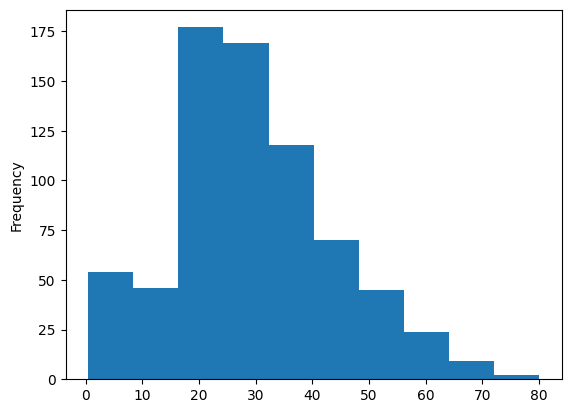

In [14]:
train_data['Age'].plot.hist()

### Fare

<Axes: ylabel='Frequency'>

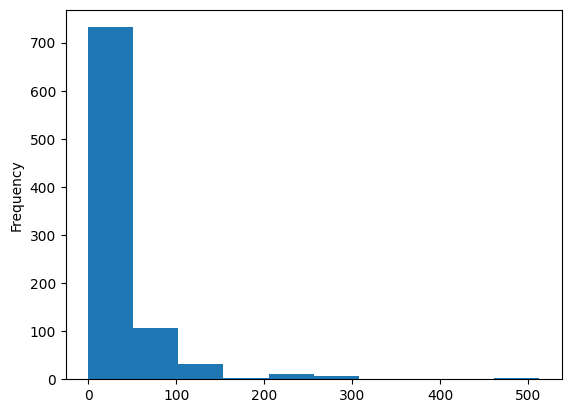

In [15]:
train_data['Fare'].plot.hist()

## Check for NULL values

In [81]:
train_data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

训练集中`Age` `Cabin` `Embarked` 列有空值

In [82]:
test_data.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

测试集中`Age` `Fare` `Cabin` 列有空值

## heatmap for null

<Axes: >

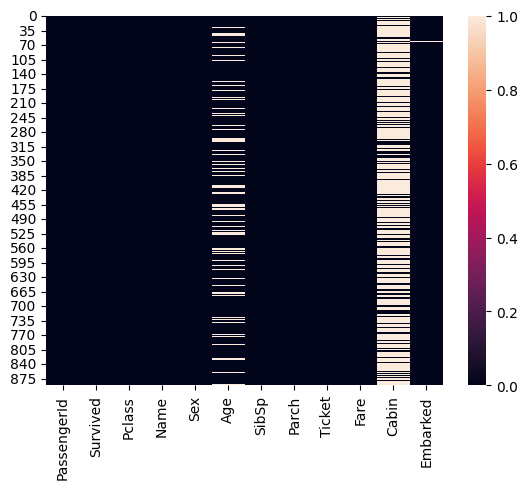

In [84]:
sns.heatmap(train_data.isnull())

<Axes: >

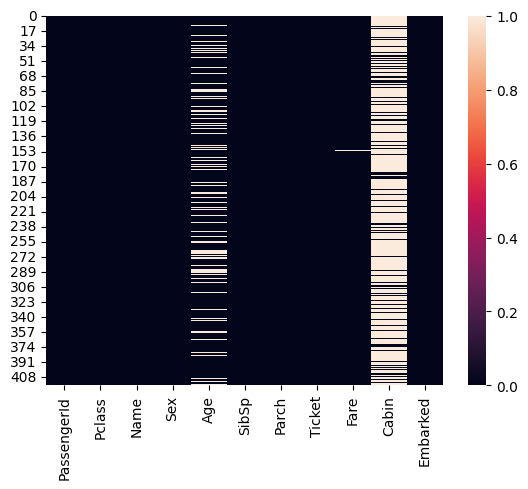

In [85]:
sns.heatmap(test_data.isnull())

从上述热力图中也可以观察到哪些特征存在空值

# 特征工程

In [17]:

from scipy.stats import mode
import string

In [18]:
def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if substring in big_string:
            return substring
    print(big_string)


增加特征
- `Title`
- `Deck`
- `Family Size`

In [19]:
def phase1clean(df):
    #setting silly values to nan
    df.Fare = df.Fare.map(lambda x: np.nan if x==0 else x)
    
    #Special case for cabins as nan may be signal
    df.Cabin = df.Cabin.fillna('Unknown')    

    #creating a title column from name
    title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
                'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
                'Don', 'Jonkheer']

    df['Title']=df['Name'].map(lambda x: substrings_in_string(x, title_list))
    
    #replacing all titles with mr, mrs, miss, master
    def replace_titles(x):
        title=x['Title']
        if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
            return 'Mr'
        elif title in ['Countess', 'Mme']:
            return 'Mrs'
        elif title in ['Mlle', 'Ms']:
            return 'Miss'
        elif title =='Dr':
            if x['Sex']=='Male':
                return 'Mr'
            else:
                return 'Mrs'
        else:
            return title
    
    df['Title']=df.apply(replace_titles, axis=1)

    #Turning cabin number into Deck
    cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Unknown']
    df['Deck']=df['Cabin'].map(lambda x: substrings_in_string(x, cabin_list))
        
    #Creating new family_size column
    df['Family_Size']=df['SibSp']+df['Parch']
    
    return df
   

- 填补空值
- 增加`Fare Per Person`
- 增加 `Age*Class`

In [20]:
def phase2clean(train, test):
    #data type dictionary
    data_type_dict={'Pclass':'ordinal', 'Sex':'nominal', 
                    'Age':'numeric', 
                    'Fare':'numeric', 'Embarked':'nominal', 'Title':'nominal',
                    'Deck':'nominal', 'Family_Size':'ordinal'}      

    #imputing nan values
    for df in [train, test]:
        classmeans = df.pivot_table(values='Fare', index='Pclass', aggfunc='mean')['Fare']
        classmeans.index = classmeans.index.astype(df['Pclass'].dtype)  # 统一类型
 
        df['Fare'] = df['Fare'].fillna(df['Pclass'].map(classmeans))
  
        meanAge=np.mean(df.Age)
        df.Age=df.Age.fillna(meanAge)
        
        modeEmbarked = df['Embarked'].mode()[0]
        df['Embarked'] = df['Embarked'].fillna(modeEmbarked)
 

#    Fare per person
    for df in [train, test]:
        df['Fare_Per_Person']=df['Fare']/(df['Family_Size']+1)
    
    #Age times class
    for df in [train, test]:
        df['Age*Class']=df['Age']*df['Pclass']
    
    data_type_dict['Fare_Per_Person']='numeric'
    data_type_dict['Age*Class']='numeric'
    
    return [train,test, data_type_dict]
    

数值型特征分箱

In [21]:
def discretise_numeric(train, test, data_type_dict, no_bins=10):
    N=len(train)
    M=len(test)
    test=test.rename(lambda x: x+N)
    joint_df = pd.concat([train, test])
    for column in data_type_dict:
        if data_type_dict[column]=='numeric':
            if not pd.api.types.is_numeric_dtype(joint_df[column]):
                 print(f"❗ Column {column} is marked numeric but isn't. Actual dtype: {joint_df[column].dtype}")
            joint_df[column] = pd.qcut(joint_df[column], no_bins, duplicates='drop')
            data_type_dict[column]='ordinal'
    train = joint_df.iloc[:N]
    test = joint_df.iloc[N:N+M]
    return train, test, data_type_dict


In [22]:
def clean(no_bins=0):
    #you'll want to tweak this to conform with your computer's file system
    trainpath = '/kaggle/input/titanic/train.csv'
    testpath = '/kaggle/input/titanic/test.csv'
    traindf = pd.read_csv(trainpath)
    testdf = pd.read_csv(testpath)

    # print(traindf.dtypes)
    
    traindf=phase1clean(traindf)
    testdf=phase1clean(testdf)
    
    traindf, testdf, data_type_dict=phase2clean(traindf, testdf)
    
    # traindf, testdf, data_type_dict=discretise_numeric(traindf, testdf, data_type_dict,no_bins)

    
    #create a submission file for kaggle
    predictiondf = pd.DataFrame(testdf['PassengerId'])
    predictiondf['Survived']=[0 for x in range(len(testdf))]
    predictiondf.to_csv('/kaggle/working/prediction.csv',
                  index=False)
    return [traindf, testdf, data_type_dict]


In [23]:
traindf, testdf, data_type_dict = clean(5)
# traindf.head()
for item in data_type_dict.keys():
    print(f'{item}: {data_type_dict[item]}')
print(traindf.dtypes)

Pclass: ordinal
Sex: nominal
Age: numeric
Fare: numeric
Embarked: nominal
Title: nominal
Deck: nominal
Family_Size: ordinal
Fare_Per_Person: numeric
Age*Class: numeric
PassengerId          int64
Survived             int64
Pclass               int64
Name                object
Sex                 object
Age                float64
SibSp                int64
Parch                int64
Ticket              object
Fare               float64
Cabin               object
Embarked            object
Title               object
Deck                object
Family_Size          int64
Fare_Per_Person    float64
Age*Class          float64
dtype: object


## 特征工程后的数据

In [24]:
traindf.info()
print('_'*40)
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Survived         891 non-null    int64  
 2   Pclass           891 non-null    int64  
 3   Name             891 non-null    object 
 4   Sex              891 non-null    object 
 5   Age              891 non-null    float64
 6   SibSp            891 non-null    int64  
 7   Parch            891 non-null    int64  
 8   Ticket           891 non-null    object 
 9   Fare             891 non-null    float64
 10  Cabin            891 non-null    object 
 11  Embarked         891 non-null    object 
 12  Title            891 non-null    object 
 13  Deck             891 non-null    object 
 14  Family_Size      891 non-null    int64  
 15  Fare_Per_Person  891 non-null    float64
 16  Age*Class        891 non-null    float64
dtypes: float64(4), i

新增加了 **5个特征** 

<Axes: xlabel='Title', ylabel='count'>

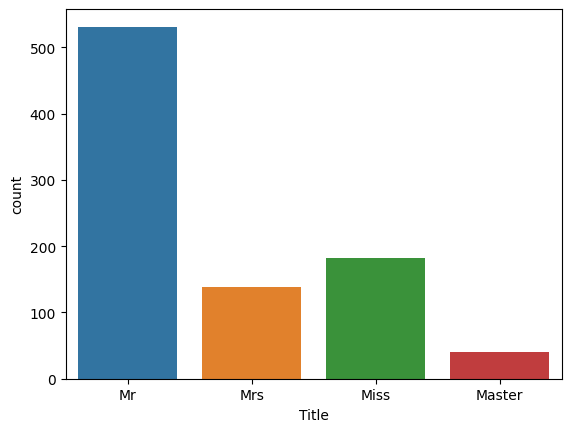

In [25]:
sns.countplot(x = 'Title', data = traindf)

<Axes: xlabel='Deck', ylabel='count'>

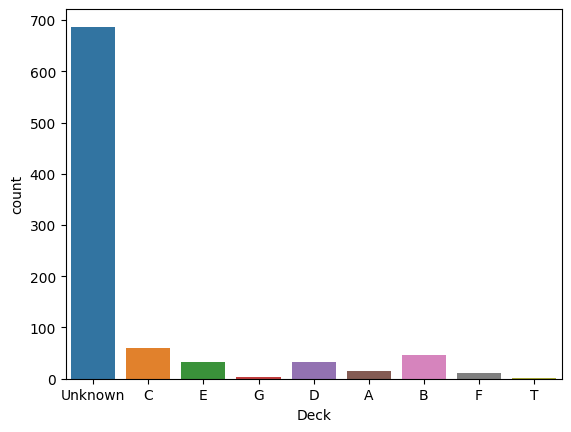

In [26]:
sns.countplot(x = 'Deck', data = traindf)

<Axes: xlabel='Family_Size', ylabel='count'>

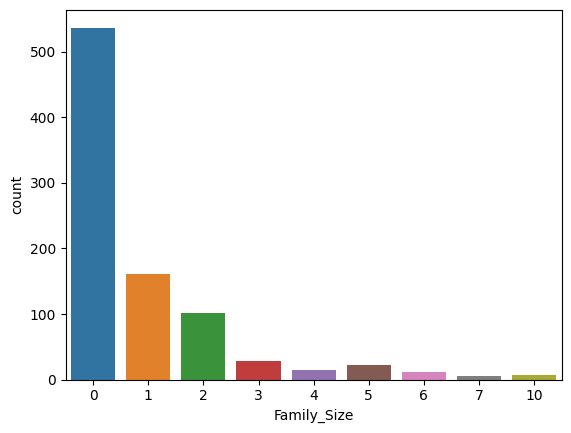

In [28]:
sns.countplot(x = 'Family_Size', data = traindf)

<Axes: ylabel='Frequency'>

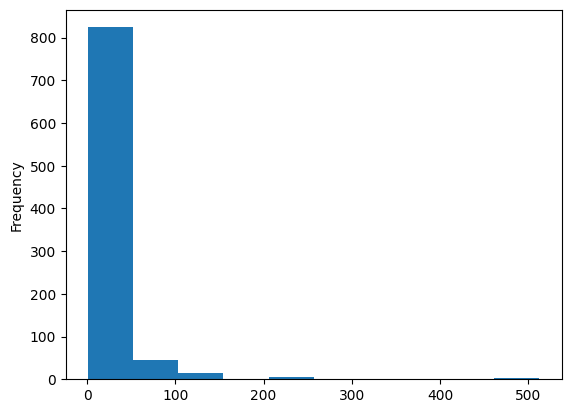

In [30]:
traindf['Fare_Per_Person'].plot.hist()

count    891.000000
mean      20.605542
std       36.086873
min        1.132143
25%        7.589600
50%        8.662500
75%       24.500000
max      512.329200
Name: Fare_Per_Person, dtype: float64


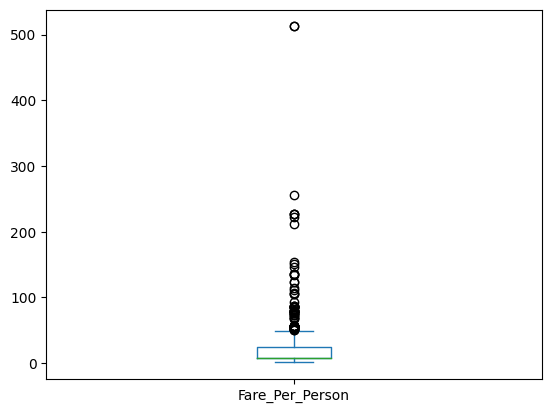

In [31]:
print(traindf['Fare_Per_Person'].describe())

traindf['Fare_Per_Person'].plot.box()
plt.show()


<Axes: ylabel='Frequency'>

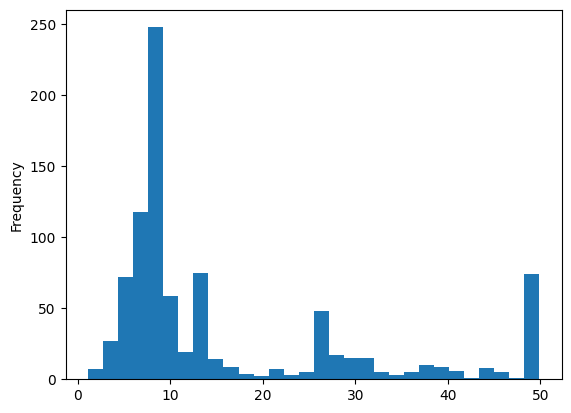

In [33]:


# 假设 traindf 已经存在
Q1 = traindf['Fare_Per_Person'].quantile(0.25)  # 第1四分位
Q3 = traindf['Fare_Per_Person'].quantile(0.75)  # 第3四分位
IQR = Q3 - Q1

# 定义上下边界
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 方法1: 把离群值替换为边界值
traindf['Fare_Per_Person'] = traindf['Fare_Per_Person'].clip(lower=lower_bound, upper=upper_bound)

# 方法2: 把离群值替换为中位数
# median_val = traindf['Fare_Per_Person'].median()
# traindf.loc[(traindf['Fare_Per_Person'] < lower_bound) | (traindf['Fare_Per_Person'] > upper_bound),
#             'Fare_Per_Person'] = median_val

# 查看结果
traindf['Fare_Per_Person'].plot.hist(bins=30)


## 类别特征编码

In [34]:
def prepare_features_for_training(train_df, test_df, features):
    """
    从 features 中提取列，对 dtype 为 object 的列做类别编码，其他保持不变。
    
    Parameters
    ----------
    train_df : pd.DataFrame
        训练集 DataFrame
    test_df : pd.DataFrame
        测试集 DataFrame
    features : list
        要提取的特征列名
    
    Returns
    -------
    X_train : np.ndarray
        训练集特征矩阵（数值）
    X_test : np.ndarray
        测试集特征矩阵（数值）
    encoders : dict
        每个类别特征的类别映射字典（方便以后反解），非类别特征不包含
    """
    train_processed = train_df[features].copy()
    test_processed = test_df[features].copy()
    
    encoders = {}
    
    for col in features:
        if train_processed[col].dtype == 'object' or str(train_processed[col].dtype).startswith('category'):
            # 取出两者所有唯一值，保证类别一致
            categories = pd.Categorical(pd.concat([train_processed[col], test_processed[col]]).astype(str)).categories
            
            # 建立映射
            encoder = {cat: idx for idx, cat in enumerate(categories)}
            encoders[col] = encoder
            
            # 映射到数字
            train_processed[col] = train_processed[col].astype(str).map(encoder)
            test_processed[col] = test_processed[col].astype(str).map(encoder)
        else:
            # 非类别特征保持不变
            train_processed[col] = train_processed[col]
            test_processed[col] = test_processed[col]
    
    # 转成 numpy 矩阵
    X_train = train_processed.values
    X_test = test_processed.values
    
    return X_train, X_test, encoders


# 划分数据集

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. 准备数据
features = ["Pclass", "Sex", "Embarked","Title","Deck","Family_Size","Fare_Per_Person","Age*Class"]
X, X_test, _ = prepare_features_for_training(traindf, testdf, features)  # 只取train部分

y = traindf["Survived"].values

# 2. 拆分训练集为训练+验证
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)




# 多个模型比较

In [53]:
# 3. 定义多个模型
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=9, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=9, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42)
}


In [54]:
# 4. 训练并验证
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    acc = accuracy_score(y_val, preds)
    results[name] = acc
    print(f"{name} 验证准确率: {acc:.4f}")

# 5. 比较结果

results_df = pd.DataFrame(list(results.items()), columns=["Model", "Validation Accuracy"]).sort_values(by="Validation Accuracy", ascending=False)
print("\n模型效果对比：")
print(results_df)


Decision Tree 验证准确率: 0.7724
Random Forest 验证准确率: 0.8358
Logistic Regression 验证准确率: 0.7948
SVM 验证准确率: 0.8209

模型效果对比：
                 Model  Validation Accuracy
1        Random Forest             0.835821
3                  SVM             0.820896
2  Logistic Regression             0.794776
0        Decision Tree             0.772388


# Random Forest

In [55]:
pred = models["Random Forest"].predict(X_test)

output = pd.DataFrame({'PassengerId': testdf['PassengerId'], 'Survived': pred})
output.to_csv('submission_random_forest.csv', index=False)
print("✅随机森林预测结果已保存！")

✅随机森林预测结果已保存！


# Deep Network Model

In [41]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


In [42]:
# 1. 数据预处理函数
def prepare_data_pytorch(df, features, label_col=None, le_dict=None, scaler=None, fit=True):
    X = df[features].copy()
    # Label Encoding 类别列
    if le_dict is None:
        le_dict = {}
    for col in X.columns:
        if X[col].dtype == 'object' or str(X[col].dtype).startswith('category'):
            if fit:
                le = LabelEncoder()
                X[col] = le.fit_transform(X[col].astype(str))
                le_dict[col] = le
            else:
                le = le_dict[col]
                X[col] = le.transform(X[col].astype(str))
    # 数值归一化
    if fit:
        scaler = StandardScaler()
        X = pd.DataFrame(scaler.fit_transform(X), columns=features)
    else:
        X = pd.DataFrame(scaler.transform(X), columns=features)

    if label_col and label_col in df.columns:
        y = df[label_col].values
        return X.values.astype(np.float32), y.astype(np.float32), le_dict, scaler
    else:
        return X.values.astype(np.float32), le_dict, scaler


In [43]:

# 2. Dataset类
class TitanicDataset(Dataset):
    def __init__(self, X, y=None):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32) if y is not None else None
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        if self.y is not None:
            return self.X[idx], self.y[idx]
        else:
            return self.X[idx]


In [44]:
# 3. 定义神经网络模型
class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.4),

            nn.Linear(128, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.3),

            nn.Linear(64, 32),
            nn.ReLU(),
            nn.BatchNorm1d(32),
            nn.Dropout(0.2),

            nn.Linear(32, 1)  # 不加 Sigmoid
        )

    def forward(self, x):
        return self.net(x)  # 直接输出 logits




In [45]:
# 4. 准备数据
features = ["Pclass", "Sex", "Age", "Embarked","Title","Deck","Family_Size","Fare_Per_Person"]
label_col = "Survived"

# 准备训练数据和标签，得到编码器和scaler
X_all, y_all, le_dict, scaler = prepare_data_pytorch(traindf, features, label_col=label_col, fit=True)

# 拆分训练和验证集
X_train, X_val, y_train, y_val = train_test_split(X_all, y_all, test_size=0.3, random_state=42, stratify=y_all)

train_dataset = TitanicDataset(X_train, y_train)
val_dataset = TitanicDataset(X_val, y_val)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)


Epoch 1/100 - Train loss: 0.6111 - Val loss: 0.5661 - Val acc: 0.7948
Epoch 2/100 - Train loss: 0.4928 - Val loss: 0.4714 - Val acc: 0.8022
Epoch 3/100 - Train loss: 0.4612 - Val loss: 0.4341 - Val acc: 0.8134
Epoch 4/100 - Train loss: 0.4437 - Val loss: 0.4269 - Val acc: 0.8209
Epoch 5/100 - Train loss: 0.4506 - Val loss: 0.4167 - Val acc: 0.8246
Epoch 6/100 - Train loss: 0.4548 - Val loss: 0.4136 - Val acc: 0.8321
Epoch 7/100 - Train loss: 0.4284 - Val loss: 0.4116 - Val acc: 0.8284
Epoch 8/100 - Train loss: 0.4251 - Val loss: 0.4071 - Val acc: 0.8209
Epoch 9/100 - Train loss: 0.4286 - Val loss: 0.4132 - Val acc: 0.8172
Epoch 10/100 - Train loss: 0.4128 - Val loss: 0.4147 - Val acc: 0.8172
Epoch 11/100 - Train loss: 0.4247 - Val loss: 0.4097 - Val acc: 0.8209
Epoch 12/100 - Train loss: 0.4161 - Val loss: 0.4094 - Val acc: 0.8284
Epoch 13/100 - Train loss: 0.4111 - Val loss: 0.4130 - Val acc: 0.8246
Epoch 14/100 - Train loss: 0.4122 - Val loss: 0.4113 - Val acc: 0.8060
Epoch 15/100 - 

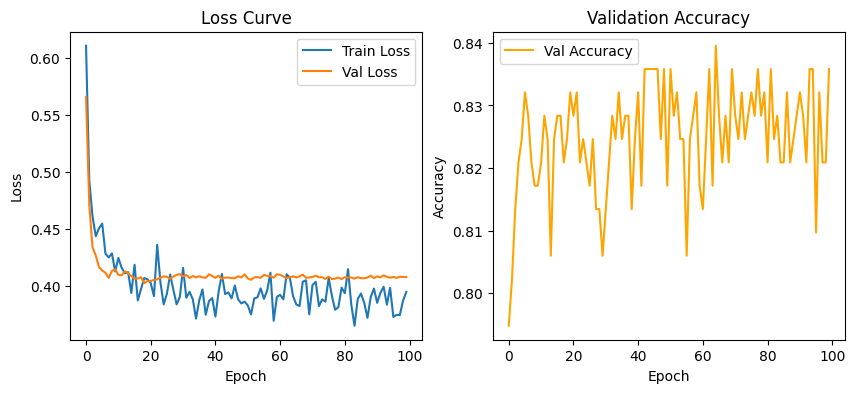

In [46]:
# ==============================
# 2. 训练流程
# ==============================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleNN(input_dim=len(features)).to(device)

criterion = nn.BCEWithLogitsLoss()  # 自动包含 Sigmoid + BCELoss 的数值稳定版本
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=5, factor=0.5)

num_epochs = 100
train_losses, val_losses, val_accs = [], [], []

for epoch in range(num_epochs):
    # ===== 训练 =====
    model.train()
    train_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device).unsqueeze(1)
        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * xb.size(0)
    train_loss /= len(train_loader.dataset)

    # ===== 验证 =====
    model.eval()
    val_loss = 0
    correct = 0
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device).unsqueeze(1)
            logits = model(xb)
            loss = criterion(logits, yb)
            val_loss += loss.item() * xb.size(0)
            predicted = (torch.sigmoid(logits) > 0.5).float()
            correct += (predicted == yb).sum().item()
    val_loss /= len(val_loader.dataset)
    val_acc = correct / len(val_loader.dataset)

    scheduler.step(val_loss)  # 学习率调度

    # 记录
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    val_accs.append(val_acc)

    print(f"Epoch {epoch+1}/{num_epochs} "
          f"- Train loss: {train_loss:.4f} "
          f"- Val loss: {val_loss:.4f} "
          f"- Val acc: {val_acc:.4f}")

# ==============================
# 3. 可视化训练曲线
# ==============================
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curve")

plt.subplot(1,2,2)
plt.plot(val_accs, label="Val Accuracy", color="orange")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Validation Accuracy")

plt.show()

In [141]:
# 6. 测试集预测
X_test, _, _ = prepare_data_pytorch(testdf, features, le_dict=le_dict, scaler=scaler, fit=False)
test_dataset = TitanicDataset(X_test)
test_loader = DataLoader(test_dataset, batch_size=32)

model.eval()
all_preds = []
with torch.no_grad():
    for xb in test_loader:
        xb = xb.to(device)
        preds = model(xb)
        preds = (preds > 0.5).cpu().numpy().astype(int).flatten()
        all_preds.extend(preds)

output = pd.DataFrame({'PassengerId': testdf['PassengerId'], 'Survived': all_preds})
output.to_csv('submission_pytorch_nn.csv', index=False)
print("✅ PyTorch 神经网络预测结果已保存！")


✅ PyTorch 神经网络预测结果已保存！
